In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# Import data to dataframe

datapath = '/home/cdoss/work/btl/datasets/sec_player_23.csv'

df = pd.read_csv(datapath)

In [2]:
# Filter only those who averaged > 0.1 xG or xA over the season
xg_frame = df[(df['xg per 90']>0.1) | (df['xa per 90']>0.1)]

# Fiter Arkansas players from that subset
car_frame = xg_frame[xg_frame['team'] == 'Arkansas Razorbacks']

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Matplotlib principles

Two ways to plot - explicitly(OOP)/implicitly. Explicit is better for our use case because of the customizability it offers. All examples to follow use the explicit methods

### Single figure

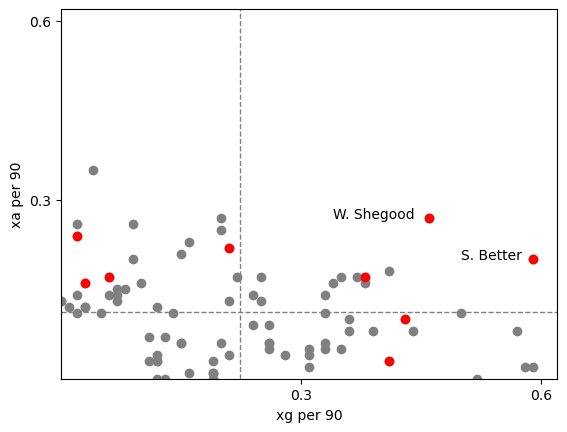

In [8]:
# Instantiate figure and axes
fig, ax = plt.subplots()

# Plot data to figure
ax.plot(xg_frame['xg per 90'], xg_frame['xa per 90'], color='gray', marker='o', linestyle='')
ax.plot(car_frame['xg per 90'], car_frame['xa per 90'], 'ro')

# Label figure and set x and y limits
ax.set_xlabel('xg per 90')
ax.set_ylabel('xa per 90')
ax.set_ybound(0, 0.62)
ax.set_xbound(0, 0.62)
ax.set_xticks([0.3, 0.6])
ax.set_yticks([0.3, 0.6])

# TO-DO -- Retrieve these values based on other criteria, and label the plot automatically
ax.text(0.34, 0.27, 'W. Shegood')
ax.text(0.5, 0.2, 'S. Better')

# Draw horizontal and vertical lines at average values for xA and xG
plt.axhline(
    y=np.nanmean(xg_frame['xa per 90']),
    color='gray',
    linestyle='--',
    linewidth=1,
)

plt.axvline(
    x=np.nanmean(xg_frame['xg per 90']),
    color='grey',
    linestyle='--',
    linewidth=1,
)

plt.style.use('default')

plt.show()

# These add various traits that might be useful on a graph
# ax.grid(True) -- Adds a grid overlay

### Facet Grid

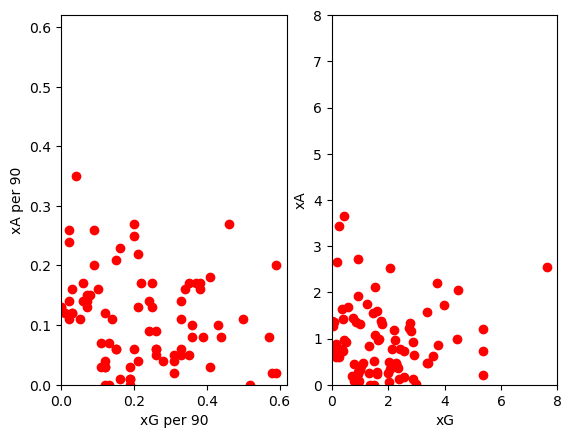

In [12]:
# Make a figure with one row and two columns of axes

fig, axs = plt.subplots(1, 2)

# Plot to the first axis
axs[0].plot(xg_frame['xg per 90'], xg_frame['xa per 90'], 'ro')
axs[0].set_xlabel('xG per 90')
axs[0].set_ylabel('xA per 90')
axs[0].set_xbound(0, 0.62)
axs[0].set_ybound(0, 0.62)

# Plot to the second axis
axs[1].plot(xg_frame['xg'], xg_frame['xa'], 'ro')
axs[1].set_xlabel('xG')
axs[1].set_ylabel('xA')
axs[1].set_xbound(0, 8)
axs[1].set_ybound(0, 8)